<a href="https://colab.research.google.com/github/pbansari25/url_dataset/blob/main/URL_LOGISTICREGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data = pd.read_csv('urlset.csv', encoding='latin-1')

<ipython-input-26-cacdd82e776b>:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('urlset.csv', encoding='latin-1')


In [27]:
data

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1,0,18,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.800000,0.795729,1.0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0,0,11,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.768577,1.0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0,0,14,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0.000000,0.726582,1.0
3,mail.printakid.com/www.online.americanexpress....,10000000,0,0,6,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.85964,1.0
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0,0,8,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.748971,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95902,www.1up.com/do/gameOverview?cId=3159391,11106,1,1,4,277.250000,289.250000,0.002681,0.003431,0.002691,0.003442,0.692308,0.802705,0.0
95903,psx.ign.com/articles/131/131835p1.html,339,1,1,2,152.000000,151.000000,0.002825,0.002841,0.000000,0.000000,0.450980,0.830816,0.0
95904,wii.gamespy.com/wii/cursed-mountain/,11812,1,1,2,47.000000,49.000000,0.017857,0.017241,0.000000,0.000000,0.550000,0.811321,0.0
95905,wii.ign.com/objects/142/14270799.html,339,1,1,2,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.450980,0.846906,0.0


In [28]:
data.head()

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1,0,18,107.611111,107.277778,0.0,0.0,0.0,0.0,0.8,0.795729,1.0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0,0,11,150.636364,152.272727,0.0,0.0,0.0,0.0,0.0,0.768577,1.0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0,0,14,73.500000,72.642857,0.0,0.0,0.0,0.0,0.0,0.726582,1.0
3,mail.printakid.com/www.online.americanexpress....,10000000,0,0,6,562.000000,590.666667,0.0,0.0,0.0,0.0,0.0,0.85964,1.0
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0,0,8,29.000000,24.125000,0.0,0.0,0.0,0.0,0.0,0.748971,1.0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95907 entries, 0 to 95906
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   domain         95907 non-null  object 
 1   ranking        95907 non-null  int64  
 2   mld_res        95907 non-null  int64  
 3   mld.ps_res     95907 non-null  int64  
 4   card_rem       95907 non-null  int64  
 5   ratio_Rrem     95907 non-null  float64
 6   ratio_Arem     95907 non-null  float64
 7   jaccard_RR     95907 non-null  float64
 8   jaccard_RA     95907 non-null  float64
 9   jaccard_AR     95907 non-null  float64
 10  jaccard_AA     95907 non-null  float64
 11  jaccard_ARrd   95907 non-null  float64
 12  jaccard_ARrem  95907 non-null  object 
 13  label          95906 non-null  float64
dtypes: float64(8), int64(4), object(2)
memory usage: 10.2+ MB


In [30]:
data.describe(include="all")

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
count,95907,9.590700e+04,95907.000000,95907.000000,95907.000000,95907.000000,95907.000000,95907.000000,95907.000000,95907.000000,95907.000000,95907.000000,95907,95906.000000
unique,95905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30746,NaN
top,bin/webscr?cmd=_login-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5013,NaN
mean,NaN,5.888988e+06,0.455587,0.202425,4.574056,135.259512,138.550726,0.004010,0.003768,0.003367,0.003644,0.307732,NaN,0.499468
std,NaN,4.878363e+06,0.498026,0.401810,4.343465,160.987866,175.478997,0.028748,0.024479,0.023795,0.028260,0.363083,NaN,0.500002
min,NaN,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,NaN,2.549900e+04,0.000000,0.000000,2.000000,43.000000,39.666667,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
50%,NaN,1.000000e+07,0.000000,0.000000,3.000000,104.043478,103.333333,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
75%,NaN,1.000000e+07,1.000000,0.000000,6.000000,174.142857,178.333333,0.000000,0.000000,0.000000,0.000000,0.666667,NaN,1.000000


In [31]:
data.shape

(95907, 14)

In [32]:
data.isnull().sum()

domain           0
ranking          0
mld_res          0
mld.ps_res       0
card_rem         0
ratio_Rrem       0
ratio_Arem       0
jaccard_RR       0
jaccard_RA       0
jaccard_AR       0
jaccard_AA       0
jaccard_ARrd     0
jaccard_ARrem    0
label            1
dtype: int64

<Axes: >

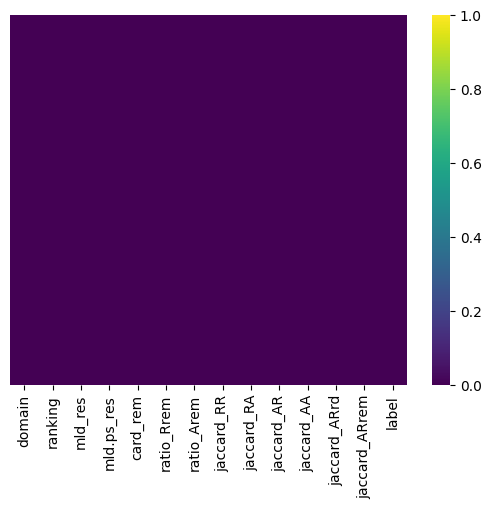

In [33]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [34]:
data.dropna(inplace=True)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
features = data.drop(columns=['domain', 'label'])

In [37]:
labels = data['label']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model = LogisticRegression()

In [41]:
model.fit(X_train, y_train)

LogisticRegression()

In [42]:
y_pred = model.predict(X_test)

In [43]:
y_prob = model.predict_proba(X_test)[:, 1]

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [45]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')

Accuracy: 0.4999
Precision: 0.4999
Recall: 1.0000
ROC-AUC: 0.7213


In [46]:
pip install weave

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.9/29.9 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.5/328.5 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 33.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of gql[requests] to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [47]:
import weave

In [48]:
%%capture
!pip install weave openai set-env-colab-kaggle-dotenv

In [49]:
# Set your OpenAI API key
from set_env import set_env

# Put your OPENAI_API_KEY in the secrets panel to the left 🗝️
_ = set_env("OPENAI_API_KEY")
# os.environ["OPENAI_API_KEY"] = "sk-..." # alternatively, put your key here

PROJECT = "weave-intro-notebook"


2024-07-17 18:29:55.700 | WARNING  | set_env.set_env:set_env:100 - 
        Unable to set OPENAI_API_KEY=OPENAI_API_KEY,
        not in colab or Secrets not set, not kaggle
        or Secrets not set, no .env/dotenv/env file
        in the current working dir or parent dirs.


In [50]:
import weave                    # import the weave library
weave.init('project-name')      # initialize tracking for a specific W&B project

Please login to Weights & Biases (https://wandb.ai/) to continue:


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Logged in as Weights & Biases user: bansaripatel250.
View Weave data at https://wandb.ai/bansaripatel250-usiu/project-name/weave


In [51]:
!pip install wandb -qU

In [52]:
# Log in to your W&B account
import wandb

# Use wandb-core
wandb.require("core")

In [53]:
wandb.login()

wandb: Currently logged in as: bansaripatel250 (bansaripatel250-usiu). Use `wandb login --relogin` to force relogin


True

Run an experiment 1️⃣. Start a new run and pass in hyperparameters to track

2️⃣. Log metrics from training or evaluation

3️⃣. Visualize results in the dashboard

In [54]:
import random

# Launch 5 simulated experiments
total_runs = 5
for run in range(total_runs):
  # 🐝 1️⃣ Start a new run to track this script
  wandb.init(
      # Set the project where this run will be logged
      project="basic-intro",
      # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
      name=f"experiment_{run}",
      # Track hyperparameters and run metadata
      config={
      "learning_rate": 0.02,
      "architecture": "CNN",
      "dataset": "CIFAR-100",
      "epochs": 10,
      })

  # This simple block simulates a training loop logging metrics
  epochs = 10
  offset = random.random() / 5
  for epoch in range(2, epochs):
      acc = 1 - 2 ** -epoch - random.random() / epoch - offset
      loss = 2 ** -epoch + random.random() / epoch + offset

      # 🐝 2️⃣ Log metrics from your script to W&B
      wandb.log({"acc": acc, "loss": loss})

  # Mark the run as finished
  wandb.finish()

acc,▁▄▆▆▆█▇█
loss,█▄▄▂▁▂▂▁
acc,0.97483
loss,0.06456


acc,▁▁▇▇█▇█▆
loss,█▆▆▃▄▂▃▁
acc,0.84171
loss,0.06329


acc,▁▃▆▇█▇▇█
loss,█▃▃▂▂▃▂▁
acc,0.85759
loss,0.13141


acc,▁▇▆██▇██
loss,█▄▃▁▃▂▁▂
acc,0.85469
loss,0.16585


acc,▁▆▇▇▇▇█▇
loss,█▆▃▄▃▁▂▁
acc,0.90474
loss,0.03174


🔥 Simple Pytorch Neural Network 💪 Run this model to train a simple MNIST classifier, and click on the project page link to see your results stream in live to a W&B project.

Any run in wandb automatically logs metrics, system information, hyperparameters, terminal output and you'll see an interactive table with model inputs and outputs.

Set up Dataloader

In [55]:
#@title
import wandb
import math
import random
import torch, torchvision
import torch.nn as nn
import torchvision.transforms as T

device = "cuda:0" if torch.cuda.is_available() else "cpu"

def get_dataloader(is_train, batch_size, slice=5):
    "Get a training dataloader"
    full_dataset = torchvision.datasets.MNIST(root=".", train=is_train, transform=T.ToTensor(), download=True)
    sub_dataset = torch.utils.data.Subset(full_dataset, indices=range(0, len(full_dataset), slice))
    loader = torch.utils.data.DataLoader(dataset=sub_dataset,
                                         batch_size=batch_size,
                                         shuffle=True if is_train else False,
                                         pin_memory=True, num_workers=2)
    return loader

def get_model(dropout):
    "A simple model"
    model = nn.Sequential(nn.Flatten(),
                         nn.Linear(28*28, 256),
                         nn.BatchNorm1d(256),
                         nn.ReLU(),
                         nn.Dropout(dropout),
                         nn.Linear(256,10)).to(device)
    return model

def validate_model(model, valid_dl, loss_func, log_images=False, batch_idx=0):
    "Compute performance of the model on the validation dataset and log a wandb.Table"
    model.eval()
    val_loss = 0.
    with torch.inference_mode():
        correct = 0
        for i, (images, labels) in enumerate(valid_dl):
            images, labels = images.to(device), labels.to(device)

            # Forward pass ➡
            outputs = model(images)
            val_loss += loss_func(outputs, labels)*labels.size(0)

            # Compute accuracy and accumulate
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()

            # Log one batch of images to the dashboard, always same batch_idx.
            if i==batch_idx and log_images:
                log_image_table(images, predicted, labels, outputs.softmax(dim=1))
    return val_loss / len(valid_dl.dataset), correct / len(valid_dl.dataset)

def log_image_table(images, predicted, labels, probs):
    "Log a wandb.Table with (img, pred, target, scores)"
    # 🐝 Create a wandb Table to log images, labels and predictions to
    table = wandb.Table(columns=["image", "pred", "target"]+[f"score_{i}" for i in range(10)])
    for img, pred, targ, prob in zip(images.to("cpu"), predicted.to("cpu"), labels.to("cpu"), probs.to("cpu")):
        table.add_data(wandb.Image(img[0].numpy()*255), pred, targ, *prob.numpy())
    wandb.log({"predictions_table":table}, commit=False)

Train Your Model



In [56]:
# Launch 5 experiments, trying different dropout rates
for _ in range(5):
    # 🐝 initialise a wandb run
    wandb.init(
        project="pytorch-intro",
        config={
            "epochs": 10,
            "batch_size": 128,
            "lr": 1e-3,
            "dropout": random.uniform(0.01, 0.80),
            })

    # Copy your config
    config = wandb.config

    # Get the data
    train_dl = get_dataloader(is_train=True, batch_size=config.batch_size)
    valid_dl = get_dataloader(is_train=False, batch_size=2*config.batch_size)
    n_steps_per_epoch = math.ceil(len(train_dl.dataset) / config.batch_size)

    # A simple MLP model
    model = get_model(config.dropout)

    # Make the loss and optimizer
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=config.lr)

   # Training
    example_ct = 0
    step_ct = 0
    for epoch in range(config.epochs):
        model.train()
        for step, (images, labels) in enumerate(train_dl):
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            train_loss = loss_func(outputs, labels)
            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()

            example_ct += len(images)
            metrics = {"train/train_loss": train_loss,
                       "train/epoch": (step + 1 + (n_steps_per_epoch * epoch)) / n_steps_per_epoch,
                       "train/example_ct": example_ct}

            if step + 1 < n_steps_per_epoch:
                # 🐝 Log train metrics to wandb
                wandb.log(metrics)

            step_ct += 1

        val_loss, accuracy = validate_model(model, valid_dl, loss_func, log_images=(epoch==(config.epochs-1)))

        # 🐝 Log train and validation metrics to wandb
        val_metrics = {"val/val_loss": val_loss,
                       "val/val_accuracy": accuracy}
        wandb.log({**metrics, **val_metrics})

        print(f"Train Loss: {train_loss:.3f}, Valid Loss: {val_loss:3f}, Accuracy: {accuracy:.2f}")

    # If you had a test set, this is how you could log it as a Summary metric
    wandb.summary['test_accuracy'] = 0.8

    # 🐝 Close your wandb run
    wandb.finish()

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 3462162.25it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 357239.70it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 2797843.49it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3836191.86it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

Train Loss: 0.219, Valid Loss: 0.294835, Accuracy: 0.91
Train Loss: 0.237, Valid Loss: 0.237481, Accuracy: 0.93
Train Loss: 0.215, Valid Loss: 0.211049, Accuracy: 0.93
Train Loss: 0.173, Valid Loss: 0.195403, Accuracy: 0.94
Train Loss: 0.124, Valid Loss: 0.175601, Accuracy: 0.94
Train Loss: 0.112, Valid Loss: 0.177069, Accuracy: 0.94
Train Loss: 0.125, Valid Loss: 0.176305, Accuracy: 0.95
Train Loss: 0.306, Valid Loss: 0.164480, Accuracy: 0.95
Train Loss: 0.082, Valid Loss: 0.157802, Accuracy: 0.95
Train Loss: 0.041, Valid Loss: 0.172159, Accuracy: 0.95


train/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/example_ct,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/train_loss,█▅▄▃▂▃▃▂▃▂▃▃▂▂▂▂▂▂▁▂▁▂▂▁▁▂▂▂▁▁▂▁▁▁▂▁▁▁▂▁
val/val_accuracy,▁▄▅▅▆▆▇███
val/val_loss,█▅▄▃▂▂▂▁▁▂
test_accuracy,0.8
train/epoch,10.0
train/example_ct,120000
train/train_loss,0.04135
val/val_accuracy,0.949
val/val_loss,0.17216


Train Loss: 0.324, Valid Loss: 0.281445, Accuracy: 0.91
Train Loss: 0.174, Valid Loss: 0.229001, Accuracy: 0.93
Train Loss: 0.185, Valid Loss: 0.198621, Accuracy: 0.94
Train Loss: 0.056, Valid Loss: 0.176328, Accuracy: 0.95
Train Loss: 0.071, Valid Loss: 0.169435, Accuracy: 0.95
Train Loss: 0.068, Valid Loss: 0.165479, Accuracy: 0.95
Train Loss: 0.032, Valid Loss: 0.151865, Accuracy: 0.95
Train Loss: 0.055, Valid Loss: 0.150022, Accuracy: 0.95
Train Loss: 0.027, Valid Loss: 0.154310, Accuracy: 0.95
Train Loss: 0.053, Valid Loss: 0.152758, Accuracy: 0.96


train/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/example_ct,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/train_loss,█▅▃▂▃▃▂▂▂▂▃▂▃▁▂▂▂▁▁▁▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val/val_accuracy,▁▃▄▆▆▇▇▇▇█
val/val_loss,█▅▄▂▂▂▁▁▁▁
test_accuracy,0.8
train/epoch,10.0
train/example_ct,120000
train/train_loss,0.05345
val/val_accuracy,0.9585
val/val_loss,0.15276


Train Loss: 0.495, Valid Loss: 0.361146, Accuracy: 0.90
Train Loss: 0.284, Valid Loss: 0.282338, Accuracy: 0.92
Train Loss: 0.337, Valid Loss: 0.257613, Accuracy: 0.92
Train Loss: 0.434, Valid Loss: 0.241959, Accuracy: 0.93
Train Loss: 0.246, Valid Loss: 0.230170, Accuracy: 0.93
Train Loss: 0.331, Valid Loss: 0.220178, Accuracy: 0.93
Train Loss: 0.294, Valid Loss: 0.215398, Accuracy: 0.93
Train Loss: 0.191, Valid Loss: 0.211671, Accuracy: 0.93
Train Loss: 0.316, Valid Loss: 0.204357, Accuracy: 0.94
Train Loss: 0.365, Valid Loss: 0.200425, Accuracy: 0.94


train/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/example_ct,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/train_loss,█▆▄▃▃▃▃▃▂▃▃▂▂▃▂▃▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▂▁▂▂▂▂▁▂▂
val/val_accuracy,▁▄▅▆▆▇▇▇██
val/val_loss,█▅▃▃▂▂▂▁▁▁
test_accuracy,0.8
train/epoch,10.0
train/example_ct,120000
train/train_loss,0.36549
val/val_accuracy,0.938
val/val_loss,0.20042


Train Loss: 0.398, Valid Loss: 0.324052, Accuracy: 0.91
Train Loss: 0.289, Valid Loss: 0.262615, Accuracy: 0.92
Train Loss: 0.228, Valid Loss: 0.232142, Accuracy: 0.93
Train Loss: 0.178, Valid Loss: 0.223621, Accuracy: 0.93
Train Loss: 0.136, Valid Loss: 0.209274, Accuracy: 0.93
Train Loss: 0.100, Valid Loss: 0.198690, Accuracy: 0.94
Train Loss: 0.119, Valid Loss: 0.190290, Accuracy: 0.94
Train Loss: 0.175, Valid Loss: 0.181864, Accuracy: 0.95
Train Loss: 0.284, Valid Loss: 0.181207, Accuracy: 0.94
Train Loss: 0.122, Valid Loss: 0.176428, Accuracy: 0.95


train/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/example_ct,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/train_loss,█▅▃▃▃▃▃▃▂▃▂▄▂▂▂▃▂▂▁▂▃▁▁▂▂▂▂▁▂▂▂▁▁▁▁▂▁▁▂▂
val/val_accuracy,▁▃▄▅▆▆▇█▇█
val/val_loss,█▅▄▃▃▂▂▁▁▁
test_accuracy,0.8
train/epoch,10.0
train/example_ct,120000
train/train_loss,0.12172
val/val_accuracy,0.947
val/val_loss,0.17643


Train Loss: 0.386, Valid Loss: 0.284261, Accuracy: 0.92
Train Loss: 0.219, Valid Loss: 0.230368, Accuracy: 0.93
Train Loss: 0.181, Valid Loss: 0.201278, Accuracy: 0.94
Train Loss: 0.159, Valid Loss: 0.184262, Accuracy: 0.95
Train Loss: 0.196, Valid Loss: 0.171903, Accuracy: 0.94
Train Loss: 0.050, Valid Loss: 0.159898, Accuracy: 0.95
Train Loss: 0.053, Valid Loss: 0.162993, Accuracy: 0.95
Train Loss: 0.069, Valid Loss: 0.155605, Accuracy: 0.96
Train Loss: 0.040, Valid Loss: 0.161362, Accuracy: 0.95
Train Loss: 0.021, Valid Loss: 0.157895, Accuracy: 0.95


train/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/example_ct,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/train_loss,█▄▄▃▂▃▃▃▂▂▂▂▂▁▃▂▁▂▁▁▁▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val/val_accuracy,▁▃▅▆▆▇▇█▇▇
val/val_loss,█▅▃▃▂▁▁▁▁▁
test_accuracy,0.8
train/epoch,10.0
train/example_ct,120000
train/train_loss,0.02121
val/val_accuracy,0.951
val/val_loss,0.15789


🔔 Try W&B Alerts W&B Alerts allows you to send alerts, triggered from your Python code, to your Slack or email. There are 2 steps to follow the first time you'd like to send a Slack or email alert, triggered from your code:

1) Turn on Alerts in your W&B User Settings

2) Add wandb.alert() to your code:

In [57]:
#wandb.alert(
    #title="Low accuracy",
    #text=f"Accuracy is below the acceptable threshold"
#)

See the minimal example below to see how to use wandb.alert. You can find the full docs for W&B Alerts here

In [58]:
# Start a wandb run
wandb.init(project="pytorch-intro")

# Simulating a model training loop
acc_threshold = 0.3
for training_step in range(1000):

    # Generate a random number for accuracy
    accuracy = round(random.random() + random.random(), 3)
    print(f'Accuracy is: {accuracy}, {acc_threshold}')

    # 🐝 Log accuracy to wandb
    wandb.log({"Accuracy": accuracy})

    # 🔔 If the accuracy is below the threshold, fire a W&B Alert and stop the run
    if accuracy <= acc_threshold:
        # 🐝 Send the wandb Alert
        wandb.alert(
            title='Low Accuracy',
            text=f'Accuracy {accuracy} at step {training_step} is below the acceptable theshold, {acc_threshold}',
        )
        print('Alert triggered')
        break

# Mark the run as finished (useful in Jupyter notebooks)
wandb.finish()

Accuracy is: 0.477, 0.3
Accuracy is: 0.808, 0.3
Accuracy is: 1.122, 0.3
Accuracy is: 0.833, 0.3
Accuracy is: 1.276, 0.3
Accuracy is: 0.725, 0.3
Accuracy is: 0.581, 0.3
Accuracy is: 1.257, 0.3
Accuracy is: 1.074, 0.3
Accuracy is: 1.253, 0.3
Accuracy is: 0.928, 0.3
Accuracy is: 0.459, 0.3
Accuracy is: 1.432, 0.3
Accuracy is: 0.543, 0.3
Accuracy is: 0.584, 0.3
Accuracy is: 1.768, 0.3
Accuracy is: 1.027, 0.3
Accuracy is: 0.433, 0.3
Accuracy is: 0.735, 0.3
Accuracy is: 0.834, 0.3
Accuracy is: 0.965, 0.3
Accuracy is: 0.574, 0.3
Accuracy is: 0.705, 0.3
Accuracy is: 1.386, 0.3
Accuracy is: 0.808, 0.3
Accuracy is: 1.399, 0.3
Accuracy is: 0.424, 0.3
Accuracy is: 1.471, 0.3
Accuracy is: 1.552, 0.3
Accuracy is: 0.683, 0.3
Accuracy is: 1.551, 0.3
Accuracy is: 0.21, 0.3
Alert triggered


Accuracy,▂▄▅▄▆▃▃▆▅▆▄▂▆▂▃█▅▂▃▄▄▃▃▆▄▆▂▇▇▃▇▁
Accuracy,0.21
